In [10]:
from concurrent import futures
import logging
import math
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

import grpc
import RemoteCam_pb2
import RemoteCam_pb2_grpc

MAX_MESSAGE_LENGTH = 10000000
PORT_CAM = 10509
HOST_IP = "localhost"

### Put correct host address and test

request 0 -> response 0


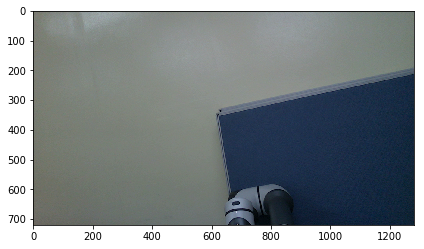

In [11]:
host = "localhost"
with grpc.insecure_channel('{}:{}'.format(HOST_IP, PORT_CAM),
                           options=[('grpc.max_send_message_length', MAX_MESSAGE_LENGTH),
                                    ('grpc.max_receive_message_length', MAX_MESSAGE_LENGTH)]) as channel:
    stub = RemoteCam_pb2_grpc.RemoteCamProtoStub(channel) 
    request_id = 0
    resp = stub.GetImage(RemoteCam_pb2.GetImageRequest(request_id=request_id))
    print("request {} -> response {}".format(request_id, resp.response_id))
    color = np.array(resp.color).reshape((resp.height, resp.width, 3))
    width = resp.width
    height= resp.height
    
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(color[:,:,[2,1,0]])

request 0 -> response 0


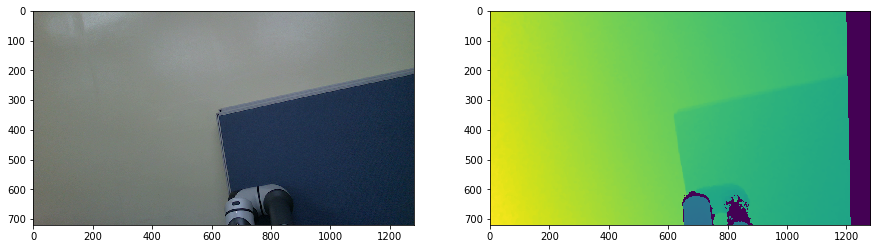

In [12]:
host = "localhost"
with grpc.insecure_channel('{}:{}'.format(HOST_IP, PORT_CAM),
                           options=[('grpc.max_send_message_length', MAX_MESSAGE_LENGTH),
                                    ('grpc.max_receive_message_length', MAX_MESSAGE_LENGTH)]) as channel:
    stub = RemoteCam_pb2_grpc.RemoteCamProtoStub(channel) 
    request_id = 0
    resp = stub.GetImageDepthmap(RemoteCam_pb2.GetImageDepthmapRequest(request_id=request_id))
    print("request {} -> response {}".format(request_id, resp.response_id))
    color = np.array(resp.color).reshape((resp.height, resp.width, 3))
    depth = np.array(resp.depth).reshape((resp.height, resp.width))
    width = resp.width
    height= resp.height
    
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(color[:,:,[2,1,0]])
plt.subplot(1,2,2)
plt.imshow(depth)

In [13]:
host = "localhost"
with grpc.insecure_channel('{}:{}'.format(HOST_IP, PORT_CAM)) as channel:
    stub = RemoteCam_pb2_grpc.RemoteCamProtoStub(channel) 
    request_id = 0
    resp = stub.GetConfig(RemoteCam_pb2.GetConfigRequest(request_id=request_id))
    print("request {} -> response {}".format(request_id, resp.response_id))
    cam_mtx = np.array(resp.camera_matrix).reshape((3, 3))
    dist_coeffs = np.array(resp.dist_coeffs).reshape((5,))
    depth_scale = resp.depth_scale
    print("Camera Marix: \n{}".format(cam_mtx))
    print("Distortion Coeffs: \n{}".format(dist_coeffs))
    print("Depth Scale: \n{}".format(depth_scale))

request 0 -> response 0
Camera Marix: 
[[899.05322266   0.         654.88366699]
 [  0.         899.21044922 352.92956543]
 [  0.           0.           1.        ]]
Distortion Coeffs: 
[ 0.15870179 -0.46903715 -0.0014261   0.00066797  0.41631824]
Depth Scale: 
0.000250000011874


In [14]:
depth.shape

(720, 1280)